In [1]:
import paito
import pandas as pd

In [2]:
df = pd.read_csv("tabela.csv")
df.head()

,TITULO,ANO,NOMES_AJUSTADOS
0,POSSVEL DESCREVER EPISDIOS DE SRIES DE TELEVI...,2017.0,"['PEDRO OLMO STANCIOLI VAZ DE MELO', 'ADRIANO ..."
1,POSSVEL PREVER EVASO COM BASE APENAS NO DESEM...,2021.0,"['SIMONE DE LIMA MARTINS', 'ALEXANDRE PLASTINO..."
2,10SENT A STABLE SENTIMENT ANALYSIS METHOD BASE...,2019.0,"['FABRICIO BENEVENUTO DE SOUZA', 'MARCOS ANDRE..."
3,2015 IEEE LATIN AMERICA NETWORK OPERATION AND ...,2016.0,"['AUGUSTO JOSE VENANCIO NETO', 'ALDRI LUIZ DOS..."
4,2ISOGENIES BETWEEN ELLIPTIC CURVES IN HESSE MODEL,2018.0,"['JULIO CESAR LOPEZ HERNANDEZ', 'RICARDO DAHAB']"


In [3]:
''' Separando os nomes para criar os vértices '''
def formatar(nomes):
    # Converte a string numa lista
    nomes = eval(nomes) 
    return [f"{nome.strip()}" for nome in nomes]

# Aplica a função a coluna de nomes
nomesNodes = df['NOMES_AJUSTADOS'].apply(formatar)

In [4]:
''' criando o grafo com matriz '''
matriz = paito.Grafo(repr="matriz", direcionado=False, ponderado=True)


In [5]:
''' criando o grafo com lista '''
lista = paito.Grafo(repr="lista", direcionado=False, ponderado=True)


In [6]:
''' adicionando os vértices na matriz '''
for array in nomesNodes:
    for nome in array:
        if nome not in matriz.vertices:
            matriz.adicionarVertice(nome)

In [7]:
''' adicionando os vértices na lista '''
for array in nomesNodes:
    for nome in array:
        if nome not in lista.vertices:
            lista.adicionarVertice(nome)

In [8]:
''' adicionando as arestas entre os autores - matriz '''
from itertools import combinations

nomes_ajustados = df['NOMES_AJUSTADOS'].apply(lambda x: eval(x))
peso = 1

for nomes in nomes_ajustados:
    if len(nomes) > 1:
        # Gerar todas as combinações possíveis de pares de nomes
        combinacoes = combinations(nomes, 2)
        for nome1, nome2 in combinacoes:
            # se a aresta já existir, incrementa no peso
            if matriz.verificarAresta(nome1, nome2) or matriz.verificarAresta(nome2, nome1) :
                peso = matriz.recuperarPeso(nome1, nome2)
                novoPeso = peso + 1 
                matriz.atualizarPesoAresta(nome1, nome2, novoPeso)

            # se não existir, adiciona aresta
            else:
                matriz.adicionarAresta(nome1, nome2)
            

In [10]:
''' adicionando as arestas entre os autores - lista '''
from itertools import combinations

nomes_ajustados = df['NOMES_AJUSTADOS'].apply(lambda x: eval(x))
peso = 1

for nomes in nomes_ajustados:
    if len(nomes) > 1:
        # Gerar todas as combinações possíveis de pares de nomes
        combinacoes = combinations(nomes, 2)
        for nome1, nome2 in combinacoes:
            # se a aresta já existir, incrementa no peso
            if lista.verificarAresta(nome1, nome2) or lista.verificarAresta(nome2, nome1) :
                peso = lista.recuperarPeso(nome1, nome2)
                novoPeso = peso + 1 
                lista.atualizarPesoAresta(nome1, nome2, novoPeso)

            # se não existir, adiciona aresta
            else:
                lista.adicionarAresta(nome1, nome2)
        

### 1) Quais pares de autores são os mais produtivos dentro da rede? Elenque os 10 pares de autores

In [11]:
''' função mais_produtivos para matriz '''
def mais_produtivos():
    pares = []
    for vertice in matriz.vertices:
        vizinhos = matriz.pegaVizinhos(vertice)
        for vizinho in vizinhos:
            peso = matriz.recuperarPeso(vertice, vizinho)
            if not any((v == vertice and w == vizinho) or (v == vizinho and w == vertice) for v, w, p in pares):
                pares.append((vertice, vizinho, peso))

    # ordena a lista de pares de nomes em ordem decrescente
    pares.sort(key=lambda x: x[2], reverse=True)

    # retorna apenas os 10 tops
    return pares[:10]

print(mais_produtivos())



[('RODRIGO DA ROSA RIGHI', 'CRISTIANO ANDRE DA COSTA', 192), ('BRUNO ZATT', 'LUCIANO VOLCAN AGOSTINI', 155), ('SIMONE ANDRE DA COSTA CAVALHEIRO', 'LUCIANA FOSS', 104), ('LUIZ GUSTAVO LEAO FERNANDES', 'DALVAN JAIR GRIEBLER', 80), ('ALDRI LUIZ DOS SANTOS', 'MICHELE NOGUEIRA LIMA', 76), ('EVERTON RANIELLY DE SOUSA CAVALCANTE', 'THAIS VASCONCELOS BATISTA', 68), ('DJAMEL FAWZI HADJ SADOK', 'JUDITH KELNER', 67), ('ADENAUER CORREA YAMIN', 'ANA MARILZA PERNAS FLEISCHMANN', 63), ('PEDRO HENRIQUE BUGATTI', 'PRISCILA TIEMI MAEDA SAITO', 58), ('CAETANO TRAINA JUNIOR', 'AGMA JUCI MACHADO TRAINA', 58)]


In [12]:
''' função mais_produtivos para lista '''
def mais_produtivos():
    pares = []
    for vertice in matriz.vertices:
        vizinhos = matriz.pegaVizinhos(vertice)
        for vizinho in vizinhos:
            peso = lista.recuperarPeso(vertice, vizinho)
            if not any((v == vertice and w == vizinho) or (v == vizinho and w == vertice) for v, w, p in pares):
                pares.append((vertice, vizinho, peso))

    # ordena a lista de pares de nomes em ordem decrescente
    pares.sort(key=lambda x: x[2], reverse=True)

    # retorna apenas os 10 tops
    return pares[:10]

print(mais_produtivos())

[('RODRIGO DA ROSA RIGHI', 'CRISTIANO ANDRE DA COSTA', 192), ('BRUNO ZATT', 'LUCIANO VOLCAN AGOSTINI', 155), ('SIMONE ANDRE DA COSTA CAVALHEIRO', 'LUCIANA FOSS', 104), ('LUIZ GUSTAVO LEAO FERNANDES', 'DALVAN JAIR GRIEBLER', 80), ('ALDRI LUIZ DOS SANTOS', 'MICHELE NOGUEIRA LIMA', 76), ('EVERTON RANIELLY DE SOUSA CAVALCANTE', 'THAIS VASCONCELOS BATISTA', 68), ('DJAMEL FAWZI HADJ SADOK', 'JUDITH KELNER', 67), ('ADENAUER CORREA YAMIN', 'ANA MARILZA PERNAS FLEISCHMANN', 63), ('PEDRO HENRIQUE BUGATTI', 'PRISCILA TIEMI MAEDA SAITO', 58), ('CAETANO TRAINA JUNIOR', 'AGMA JUCI MACHADO TRAINA', 58)]


### 2) Quantas componentes o grafo possui? O que isso representa?


In [13]:
'''Matriz'''
components = matriz.extractComponents()
print(f"O grafo apresenta o total de {len(components)} componentes.")

O grafo apresenta o total de 5 componentes.


In [14]:
'''Lista'''
components = lista.extractComponents()
print(f"O grafo apresenta o total de {len(components)} componentes.")

O grafo apresenta o total de 5 componentes.


### 3) Qual é a distribuição dos graus dos nós da rede? Essa distribuição demonstra comportamento de uma rede complexa?

d:\faculdadadade\5º Período\Graphs\TDE2\TDE-2---Graphs\paito.py:1411: UserWarning: 
The palette list has fewer values (8) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='graus', palette=colors, hue='graus', dodge=False, legend=False)


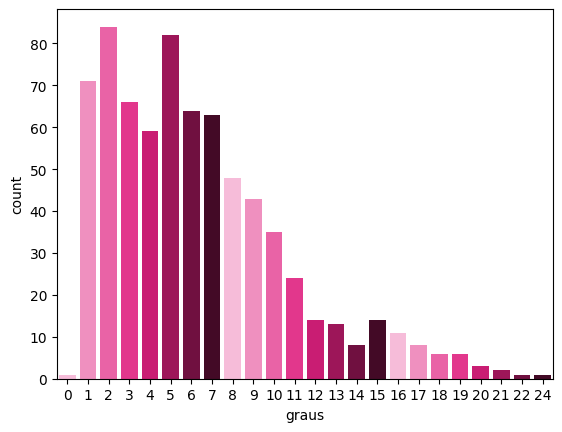

In [15]:
''' Aqui usaremos o gráfico para nos auxiliar na identificação da distribuição de grau'''
matriz.gerarHistograma()

### 4) Quais são os 10 autores mais influentes perante a métrica de centralidade de grau?  O que essa métrica representa nesse contexto?

In [16]:
''' Função que calcula a centralidade de grau e retorna os 10 mais tops - matriz'''
def top_degree_centralities():
    degreeCentralities = matriz.allDegreeCentralities()

    # retorna os top 10 vértices com a maior centralidade de grau em ordem decrescente
    return sorted(degreeCentralities.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_degree_centralities())


[('JO UEYAMA', 0.0331), ('MARCOS KALINOWSKI', 0.0303), ('LI WEIGANG', 0.0289), ('ANTONIO ALFREDO FERREIRA LOUREIRO', 0.0289), ('WAGNER MEIRA JUNIOR', 0.0275), ('CRISTIANO ANDRE DA COSTA', 0.0275), ('RODOLFO IPOLITO MENEGUETTE', 0.0275), ('GERALDO PEREIRA ROCHA FILHO', 0.0262), ('DAVID MENOTTI GOMES', 0.0262), ('UEVERTON DOS SANTOS SOUZA', 0.0262)]


In [17]:
''' Função que calcula a centralidade de grau e retorna os 10 mais tops - lista'''
def top_degree_centralities():
    degreeCentralities = lista.allDegreeCentralities()

    # retorna os top 10 vértices com a maior centralidade de grau em ordem decrescente
    return sorted(degreeCentralities.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_degree_centralities())


[('JO UEYAMA', 0.0331), ('MARCOS KALINOWSKI', 0.0303), ('LI WEIGANG', 0.0289), ('ANTONIO ALFREDO FERREIRA LOUREIRO', 0.0289), ('WAGNER MEIRA JUNIOR', 0.0275), ('CRISTIANO ANDRE DA COSTA', 0.0275), ('RODOLFO IPOLITO MENEGUETTE', 0.0275), ('GERALDO PEREIRA ROCHA FILHO', 0.0262), ('DAVID MENOTTI GOMES', 0.0262), ('UEVERTON DOS SANTOS SOUZA', 0.0262)]


### 5) Quais são os 10 autores mais influentes perante a métrica de centralidade de intermediação?

In [18]:
''' Função que calcula a centralidade de intermediação e retorna os 10 mais tops - matriz'''
def top_bet_centralities():
    betCentralities = matriz.allNodesBet()

    # retorna os top 10 vértices com a maior centralidade de grau em ordem decrescente
    return sorted(betCentralities.items(), key=lambda x: x[1], reverse=True)[:10]

# print(top_bet_centralities())


In [19]:
''' Função que calcula a centralidade de intermediação e retorna os 10 mais tops - lista'''
def top_bet_centralities():
    betCentralities = lista.allNodesBet()

    # retorna os top 10 vértices com a maior centralidade de grau em ordem decrescente
    return sorted(betCentralities.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_bet_centralities())

[('JO UEYAMA', 0.04533683453823752), ('EDISON PIGNATON DE FREITAS', 0.03728785689773236), ('ROBERTO PEREIRA', 0.03480063746255947), ('ANDRE CARLOS PONCE DE LEON FERREIRA DE CARVALHO', 0.031774277534539236), ('MARCOS KALINOWSKI', 0.031088716179455498), ('VINICIUS FERNANDES DOS SANTOS', 0.03080951447518708), ('ADRIANO LORENA INACIO DE OLIVEIRA', 0.027830527736847428), ('GISELE LOBO PAPPA', 0.02676359660837196), ('LI WEIGANG', 0.02666901614997547), ('ALDRI LUIZ DOS SANTOS', 0.02560827949536231)]


### 6) Quais são os 10 autores mais influentes perante a métrica de centralidade de proximidade? O que essa métrica representa nesse contexto?

In [20]:
''' Função que calcula os 10 tops closeness - matriz'''
def top_closeness():
    closenesses = matriz.closeness()

    return sorted(closenesses, reverse=True)[:10]

print(top_closeness())

[('ZHAO LIANG', 0.2871), ('ZANONI DIAS', 0.2585), ('YURI ABITBOL DE MENEZES FROTA', 0.2173), ('YOSHIKO WAKABAYASHI', 0.2249), ('YOSHIHARU KOHAYAKAWA', 0.2167), ('WILLIAM ROBSON SCHWARTZ', 0.2866), ('WEVERTON LUIS DA COSTA CORDEIRO', 0.2531), ('WANDERLEY LOPES DE SOUZA', 0.2016), ('WALDEMAR CELES FILHO', 0.2201), ('WAGNER MEIRA JUNIOR', 0.2657)]


In [21]:
''' Função que calcula os 10 tops closeness - lista'''
def top_closeness():
    closenesses = lista.closeness()

    return sorted(closenesses, reverse=True)[:10]

print(top_closeness())

[('ZHAO LIANG', 0.2871), ('ZANONI DIAS', 0.2585), ('YURI ABITBOL DE MENEZES FROTA', 0.2173), ('YOSHIKO WAKABAYASHI', 0.2249), ('YOSHIHARU KOHAYAKAWA', 0.2167), ('WILLIAM ROBSON SCHWARTZ', 0.2866), ('WEVERTON LUIS DA COSTA CORDEIRO', 0.2531), ('WANDERLEY LOPES DE SOUZA', 0.2016), ('WALDEMAR CELES FILHO', 0.2201), ('WAGNER MEIRA JUNIOR', 0.2657)]


### 7) Quais são os 10 autores mais influentes perante a metrica de centralidade de excentricidade? O que essa métrica representa nesse contexto?

In [9]:
''' Função que calcula os 10 tops eccentricity - lista'''
def top_eccentricities():
    components = lista.extractComponents()
    eccentricities = lista.componentsEccentricity(components)
    allEcc = []

    # adicionando todas as excentricidades em uma lista só
    for e in eccentricities:
        allEcc.extend(e)
    
    maior = sorted(allEcc, reverse=True)[:10]
    print(maior)

print(top_eccentricities())



TypeError: list indices must be integers or slices, not str

In [23]:
for component in components:
    print(len(component))
    print("COMPONENTE OLHA SO",component)

720
COMPONENTE OLHA SO dict_keys(['ALEX SANDRO GOMES', 'RAFAEL DIAS ARAUJO', 'VINICIUS FERNANDES DOS SANTOS', 'LUIS ANTONIO BRASIL KOWADA', 'ALEXANDRE PLASTINO DE CARVALHO', 'ISABEL CRISTINA MELLO ROSSETI', 'LUIDI GELABERT SIMONETTI', 'FRANKLIN DE LIMA MARQUEZINO', 'DANIEL RATTON FIGUEIREDO', 'LAURA SILVIA BAHIENSE DA SILVA LEITE', 'PEDRO HENRIQUE GONZALEZ SILVA', 'RAPHAEL CARLOS SANTOS MACHADO', 'SANDRO JOSE RIGO', 'PATRICIA AUGUSTIN JAQUES MAILLARD', 'SANDRO RIGO', 'CRISTIANO ANDRE DA COSTA', 'CESAR HENRIQUE COMIN', 'ROBERTO MARCONDES CESAR JUNIOR', 'FABIO LUCIANO VERDI', 'JOAO LUIS GARCIA ROSA', 'MURILLO GUIMARAES CARNEIRO', 'RICARDO RODRIGUES CIFERRI', 'WANDERLEY LOPES DE SOUZA', 'DANIEL LUCREDIO', 'FABIANO CUTIGI FERRARI', 'AURI MARCELO RIZZO VINCENZI', 'ANDRE TAKESHI ENDO', 'JOSE CARLOS MALDONADO', 'JOSE REGINALDO HUGHES CARVALHO', 'ELAINE HARADA TEIXEIRA DE OLIVEIRA', 'JOSE PALAZZO MOREIRA DE OLIVEIRA', 'MIRELLA MOURA MORO', 'PEDRO OLMO STANCIOLI VAZ DE MELO', 'ALBERTO HENRIQUE 

### 8) Calcule o diâmetro e o raio do grafo. O que essas métricas representam nesse contexto?

### 9) Quais são as 10 arestas mais relevantes no grafo perante a métrica de centralidade de intermediação? Dentre essas arestas, há algum comportamento que se destaca?

### 10) Qual é a média das distâncias geodésicas da maior componente do grafo? O que essa métrica representa nesse contexto? 

### 11) Dentro do grafo, encontre a componente com a maior quantidade de vértices. Dentro desta componente, execute o algoritmo de Girvan-Newman e encontre as quatro principais comunidades. Para cada comunidade, identifique e discuta os autores mais significativos de acordo com as métricas que julgar mais adequado